# CNN, First model

### Imports and fetch data

In [13]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import TensorBoard, EarlyStopping
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# import data
with open('X_train_even.pickle', 'rb') as handle:
    X_train = pickle.load(handle)
    
with open('Y_train_even.pickle', 'rb') as handle:
    Y_train = pickle.load(handle)
    
with open('scores_train_even.pickle', 'rb') as handle:
    scores_train = pickle.load(handle)
    
with open('X_test_even.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
with open('Y_test_even.pickle', 'rb') as handle:
    Y_test = pickle.load(handle)
    
with open('scores_test_even.pickle', 'rb') as handle:
    scores_test = pickle.load(handle)
    
# import dictionaries
with open('ix_to_word.pickle', 'rb') as handle:
    ix_to_word = pickle.load(handle)
    
# small change in format
tmp = np.concatenate(X_train).ravel()
X_train = np.reshape(tmp,(len(X_train),100))

tmp = np.concatenate(X_test).ravel()
X_test = np.reshape(tmp,(len(X_test),100))

review_length = X_test.shape[1]
num_words = 46210

print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))
print('The length of each review is {}.'.format(review_length))


Loaded dataset with 199483 training samples, 49871 test samples
The length of each review is 100.


In [15]:
num_datapoints = 10000

small_Y = Y_train[0:num_datapoints]
small_X = X_train[0:num_datapoints]

### Define models to try

In [16]:
def one_conv_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [17]:
def two_conv_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [18]:
def two_conv_regularized_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [19]:
def two_conv_regularized_larger_kernel_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [20]:
def three_conv_regularized_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=50, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=30, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=20, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [21]:
def three_conv_more_filter_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [22]:
def three_conv_larger_kernel_model(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=100, kernel_size=5, padding='valid', activation='relu', strides=1))
    model.add(BatchNormalization())
    model.add(GlobalMaxPooling1D())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [23]:
def vanilla_nn(review_length, num_words):
    model = Sequential()
    emb = Embedding(num_words, 200, input_length=review_length)
    model.add(emb)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

### Train models

In [24]:
model = one_conv_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/one_conv_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 16s 99us/step - loss: 0.3315 - acc: 0.8544 - val_loss: 0.2614 - val_acc: 0.8952
Epoch 2/10
159586/159586 [==============================] - 15s 96us/step - loss: 0.1892 - acc: 0.9283 - val_loss: 0.2715 - val_acc: 0.8956
Epoch 3/10
159586/159586 [==============================] - 15s 96us/step - loss: 0.1027 - acc: 0.9638 - val_loss: 0.3137 - val_acc: 0.8933
Epoch 4/10
159586/159586 [==============================] - 15s 96us/step - loss: 0.0488 - acc: 0.9846 - val_loss: 0.4029 - val_acc: 0.8933
Epoch 5/10
159586/159586 [==============================] - 15s 96us/step - loss: 0.0259 - acc: 0.9917 - val_loss: 0.4798 - val_acc: 0.8937
Epoch 6/10
159586/159586 [==============================] - 15s 97us/step - loss: 0.0175 - acc: 0.9946 - val_loss: 0.5932 - val_acc: 0.8883
Epoch 7/10
159586/159586 [==============================] - 15s 96us/step - loss: 0.0197 - acc: 0.9937 - val_

In [45]:
model.save('one_conv_model.h5')

In [43]:
model = two_conv_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=2, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/2
159586/159586 [==============================] - 20s 124us/step - loss: 0.3367 - acc: 0.8506 - val_loss: 0.2630 - val_acc: 0.8931
Epoch 2/2
159586/159586 [==============================] - 19s 120us/step - loss: 0.1920 - acc: 0.9264 - val_loss: 0.2519 - val_acc: 0.9015


In [46]:
model.save('two_conv_model.h5')

In [28]:
model = two_conv_regularized_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_regularized_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 24s 149us/step - loss: 0.3336 - acc: 0.8551 - val_loss: 0.2634 - val_acc: 0.8930
Epoch 2/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.1917 - acc: 0.9261 - val_loss: 0.2782 - val_acc: 0.8935
Epoch 3/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.1191 - acc: 0.9563 - val_loss: 0.2960 - val_acc: 0.8969
Epoch 4/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.0718 - acc: 0.9744 - val_loss: 0.3581 - val_acc: 0.8919
Epoch 5/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.0530 - acc: 0.9810 - val_loss: 0.4041 - val_acc: 0.8946
Epoch 6/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.0409 - acc: 0.9857 - val_loss: 0.4542 - val_acc: 0.8912
Epoch 7/10
159586/159586 [==============================] - 23s 145us/step - loss: 0.0350 - acc: 0.9877

In [47]:
model.save('two_conv_regularized_model.h5')

In [30]:
model = two_conv_regularized_larger_kernel_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/two_conv_regularized_larger_kernel_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 26s 163us/step - loss: 0.3402 - acc: 0.8516 - val_loss: 0.2778 - val_acc: 0.8862
Epoch 2/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.1866 - acc: 0.9288 - val_loss: 0.2626 - val_acc: 0.8977
Epoch 3/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.1074 - acc: 0.9611 - val_loss: 0.3988 - val_acc: 0.8715
Epoch 4/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.0670 - acc: 0.9763 - val_loss: 0.3544 - val_acc: 0.8928
Epoch 5/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.0445 - acc: 0.9844 - val_loss: 0.4103 - val_acc: 0.8950
Epoch 6/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.0391 - acc: 0.9862 - val_loss: 0.5156 - val_acc: 0.8810
Epoch 7/10
159586/159586 [==============================] - 25s 154us/step - loss: 0.0355 - acc: 0.9875

In [48]:
model.save('two_conv_regularized_larger_kernel_model.h5')

In [32]:
model = three_conv_regularized_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/three_conv_regularized_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 200)          9242000   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 99, 50)            20050     
_________________________________________________________________
batch_normalization_5 (Batch (None, 99, 50)            200       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 98, 30)            3030      
_________________________________________________________________
batch_normalization_6 (Batch (None, 98, 30)            120       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 97, 20)            1220      
_________________________________________________________________
batch_normalization_7 (Batch (None, 97, 20)            80        
__________

In [49]:
model.save('three_conv_regularized_model.h5')

In [34]:
model = three_conv_more_filter_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/three_conv_more_filter_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 30s 191us/step - loss: 0.3396 - acc: 0.8512 - val_loss: 0.2705 - val_acc: 0.8878
Epoch 2/10
159586/159586 [==============================] - 29s 179us/step - loss: 0.2051 - acc: 0.9194 - val_loss: 0.3167 - val_acc: 0.8768
Epoch 3/10
159586/159586 [==============================] - 29s 179us/step - loss: 0.1383 - acc: 0.9481 - val_loss: 0.2936 - val_acc: 0.8944
Epoch 4/10
159586/159586 [==============================] - 29s 179us/step - loss: 0.0907 - acc: 0.9672 - val_loss: 0.3279 - val_acc: 0.8938
Epoch 5/10
159586/159586 [==============================] - 29s 179us/step - loss: 0.0676 - acc: 0.9753 - val_loss: 0.3533 - val_acc: 0.8914
Epoch 6/10
159586/159586 [==============================] - 29s 179us/step - loss: 0.0490 - acc: 0.9824 - val_loss: 0.3998 - val_acc: 0.8898
Epoch 7/10
159586/159586 [==============================] - 29s 179us/step - loss: 0.0440 - acc: 0.9842

In [50]:
model.save('three_conv_more_filter_model.h5')

In [44]:
model = three_conv_larger_kernel_model(review_length, num_words)
tb = TensorBoard(log_dir='./logs/three_conv_larger_kernel_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1)

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 33s 205us/step - loss: 0.3465 - acc: 0.8471 - val_loss: 0.2675 - val_acc: 0.8890
Epoch 2/10
159586/159586 [==============================] - 32s 198us/step - loss: 0.2036 - acc: 0.9211 - val_loss: 0.2792 - val_acc: 0.8907
Epoch 3/10
159586/159586 [==============================] - 32s 198us/step - loss: 0.1263 - acc: 0.9532 - val_loss: 0.2903 - val_acc: 0.8964
Epoch 4/10
159586/159586 [==============================] - 32s 198us/step - loss: 0.0844 - acc: 0.9695 - val_loss: 0.3360 - val_acc: 0.8939
Epoch 5/10
159586/159586 [==============================] - 32s 198us/step - loss: 0.0591 - acc: 0.9786 - val_loss: 0.3667 - val_acc: 0.8957
Epoch 6/10
159586/159586 [==============================] - 32s 198us/step - loss: 0.0436 - acc: 0.9850 - val_loss: 0.4240 - val_acc: 0.8922
Epoch 7/10
159586/159586 [==============================] - 32s 198us/step - loss: 0.0379 - acc: 0.9866

KeyboardInterrupt: 

In [51]:
model.save('three_conv_larger_kernel_model.h5')

In [38]:
model = vanilla_nn(review_length, num_words)
tb = TensorBoard(log_dir='./logs/vanilla_nn_model')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])
#model.fit(small_X, small_Y, validation_split=0.2, epochs=10, batch_size=256, verbose=1, callbacks=[tb])

Train on 159586 samples, validate on 39897 samples
Epoch 1/10
159586/159586 [==============================] - 17s 105us/step - loss: 0.3486 - acc: 0.8453 - val_loss: 0.2852 - val_acc: 0.8809
Epoch 2/10
159586/159586 [==============================] - 16s 103us/step - loss: 0.1279 - acc: 0.9533 - val_loss: 0.3617 - val_acc: 0.8733
Epoch 3/10
159586/159586 [==============================] - 16s 102us/step - loss: 0.0319 - acc: 0.9898 - val_loss: 0.5536 - val_acc: 0.8721
Epoch 4/10
159586/159586 [==============================] - 16s 103us/step - loss: 0.0103 - acc: 0.9969 - val_loss: 0.7078 - val_acc: 0.8749
Epoch 5/10
159586/159586 [==============================] - 16s 102us/step - loss: 0.0080 - acc: 0.9974 - val_loss: 0.8330 - val_acc: 0.8701
Epoch 6/10
159586/159586 [==============================] - 16s 102us/step - loss: 0.0242 - acc: 0.9917 - val_loss: 0.7343 - val_acc: 0.8716
Epoch 7/10
159586/159586 [==============================] - 16s 103us/step - loss: 0.0097 - acc: 0.9968

In [52]:
model.save('vanilla_nn.h5')

### Predict

In [ ]:
model.save('two_conv_regularized_larger_kernel_model.h5')

In [5]:
model = load_model('two_conv_regularized_larger_kernel_model.h5')

In [6]:
print(model.summary())
preds = np.round(model.predict(X_test)).T
preds = preds[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 100, 200)          9242000   
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 99, 100)           40100     
_________________________________________________________________
batch_normalization_25 (Batc (None, 99, 100)           400       
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 96, 100)           40100     
_________________________________________________________________
batch_normalization_26 (Batc (None, 96, 100)           400       
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               25856     
__________

### Investigate misclassifications

In [57]:
misclassifications = np.where(preds!=Y_test)
misclassifications = misclassifications[0]
print('Out of {} test reviews, {} were misclassified.'.format(len(Y_test), len(misclassifications)))
print('A few examples of the misclassified reviews:')

def print_sentence(index):
    sentence_ix = misclassifications[index]
    tmp = []
    for val in X_test[sentence_ix]:
        if ix_to_word[str(val)] == 'ZERO':
            break
        tmp.append(ix_to_word[str(val)])
    processed_sentence = ' '.join(tmp)
    print(processed_sentence)
    
def print_misclassification(index):
    print('1. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[index]], Y_test[misclassifications[index]], scores_test[misclassifications[index]]))
    print_sentence(index)
    print(' ')
  
print_misclassification(0)
print_misclassification(10)
print_misclassification(20)
print_misclassification(30)
print_misclassification(40)
print_misclassification(50)
print_misclassification(60)
#print('1. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[0]], Y_test[misclassifications[0]], scores_test[misclassifications[0]]))
#print_sentence(0)
#print('2. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[1]], Y_test[misclassifications[1]], scores_test[misclassifications[1]]))
#print_sentence(1)
#print('3. Predicted output: {} Actual label: {} Score: {}'.format(preds[misclassifications[2]], Y_test[misclassifications[2]], scores_test[misclassifications[2]]))
#print_sentence(2)

Out of 49871 test reviews, 4902 were misclassified.
A few examples of the misclassified reviews:
1. Predicted output: 0.0 Actual label: 1 Score: 4
this is good flavorful coffee but just not quite the right blend for me there are others i like more so will not be ordering it again good price from amazon though
 
1. Predicted output: 0.0 Actual label: 1 Score: 5
both my puppy puggle and 2 year old shitzu these treats it did in fact assist me in training the puggle but now that she is getting older and doing well i am starting to use this as a treat delivery was also fast so i was happy about that because it came at a perfect time
 
1. Predicted output: 1.0 Actual label: 0 Score: 3
it gives your water a mild flavor the small packaging is very good handy to carry with you or keep in your desk this was fun to try but i prefer my water straight
 
1. Predicted output: 1.0 Actual label: 0 Score: 3
the instructions on how to prepare this box of macaroni and cheese are basically the same as the 

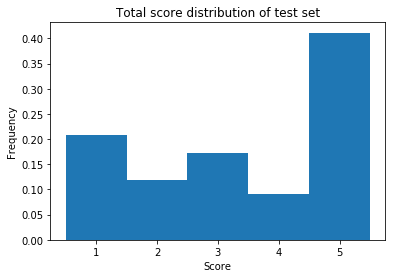

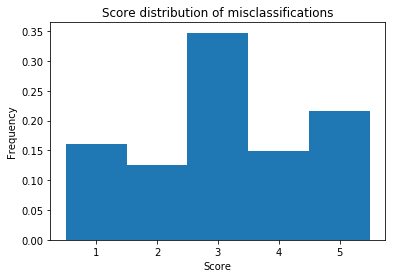

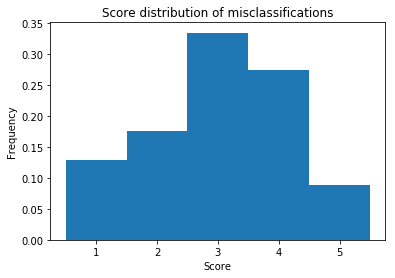

In [47]:
###### SCORE DISTRIBUTION ######
plt.hist(scores_test, bins=[1,2,3,4,5,6], normed=True)
plt.title('Total score distribution of test set')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Total number of data points: %d' %len(Y_even))

plt.hist(scores_test[misclassifications], bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
#plt.Axes.set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5])
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Number of training data points: %d' %len(Y_train_even))

num_scores = [sum(scores_test == 1), sum(scores_test == 2), sum(scores_test == 3), sum(scores_test == 4), sum(scores_test == 5)]
num_scores_misclassifications = [sum(scores_test[misclassifications] == 1), sum(scores_test[misclassifications] == 2), sum(scores_test[misclassifications] == 3), sum(scores_test[misclassifications] == 4), sum(scores_test[misclassifications] == 5)]

scaled_scores_mis = [num_scores_misclassifications[i]/num_scores[i] for i in range(5)]
scaled_scores_mis = np.round([x*1000 for x in scaled_scores_mis])
scaled_scores_mis_data = [1] * int(scaled_scores_mis[0]) + [2] * int(scaled_scores_mis[1]) + [3] * int(scaled_scores_mis[2]) + [4] * int(scaled_scores_mis[3]) + [5] * int(scaled_scores_mis[4])

plt.hist(scaled_scores_mis_data, bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
#plt.Axes.set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5])
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Number of training data points: %d' %len(Y_train_even))